In [6]:
import pandas as pd
import os
import matplotlib
import numpy as np
import json
import csv
import re

In [7]:
file_path="C:\\Users\shail\Movies-ETL\wikipedia-movies.json"

In [8]:
#Using with and load load the file as list of dictionaries
with open(file_path,mode='r') as file:
    wiki_movies_raw=json.load(file)
#print(wiki_movies_raw[0]['Produced by'])
len(wiki_movies_raw)

7311

In [9]:
len(wiki_movies_raw)
wiki_movies__raw_df=pd.DataFrame(wiki_movies_raw)
#wiki_movies_df.head()
wiki_movies_df.columns.tolist()

NameError: name 'wiki_movies_df' is not defined

In [10]:
#loop through wiki_movies_raw and get only those movies who has a director and imdb link
wiki_movies=[movie for movie in wiki_movies_raw
              if ('Director' in movie or 'Directed by' in movie)
              and 'imdb_link' in movie
              and 'No. of episodes'not in movie
            ]
            

wiki_movies_df=pd.DataFrame(wiki_movies)
#wiki_movies_df.head(111)
#print(wiki_movies[111])

In [11]:

wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['url']

6834    https://en.wikipedia.org/wiki/The_Insult_(film)
7058     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [12]:
def clean_movie(movie):
    movie = dict(movie)
    #List of alternative titles(languages)
    alternative_titles={}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alternative_titles[key]=movie[key]
            movie.pop(key)
    #print(movie['url'])
    #print(alternative_titles)
    if len(alternative_titles) >0:
        movie['alt_titles']= alternative_titles
        
    # merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
            #print(movie['url'])
            #print("............")
            #print(f"{new_name},{movie[new_name]}")
            
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')
    
    
    
    
    return movie
    

In [13]:
clean_movies=[clean_movie(movie) for movie in wiki_movies]
#print(clean_movies[0])

In [14]:
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())


['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [15]:
#Columns are cleaned up..now clean up the rows
#Extract imdb id from movie url
wiki_movies_df['imdb_id']=wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset='imdb_id',inplace=True)
print(len(wiki_movies_df))

7076
7033


In [16]:
wiki_movies_df.columns

Index(['url', 'year', 'imdb_link', 'title', 'Based on', 'Starring',
       'Narrated by', 'Cinematography', 'Release date', 'Running time',
       'Country', 'Language', 'Budget', 'Box office', 'Director',
       'Distributor', 'Editor(s)', 'Composer(s)', 'Producer(s)',
       'Production company(s)', 'Writer(s)', 'Genre', 'Original language(s)',
       'Original network', 'Executive producer(s)', 'Production location(s)',
       'Picture format', 'Audio format', 'Voices of', 'Followed by',
       'Created by', 'Preceded by', 'Suggested by', 'alt_titles', 'Recorded',
       'Venue', 'Label', 'Animation by', 'Color process', 'imdb_id'],
      dtype='object')

In [17]:
#Drop all the null values from all the columns
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]
wiki_movies_df

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Budget,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,...,$20 million,$21.4 million,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,...,$6 million,$2.7 million,James Foley,Avenue Pictures,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,...,$35 million,"$57,718,089",Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,...,$12 million,"$7,331,647",Woody Allen,Orion Pictures,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",95 minutes,US,...,$25 million,"$6,939,946 (USA)",John Cornell,Paramount Pictures,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",Oliver Wood,"[December 25, 2018, (, 2018-12-25, ), (United ...",90 minutes,United States,...,$42 million,$41.9 million,Etan Cohen,Sony Pictures Releasing,Dean Zimmerman,Mark Mothersbaugh,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...","[Columbia Pictures, Gary Sanchez Productions, ...",Etan Cohen,tt1255919
7072,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",Greig Fraser,"[December 11, 2018, (, 2018-12-11, ), (, Samue...",132 minutes,United States,...,$60 million,$76.1 million,Adam McKay,Mirror Releasing,Hank Corwin,Nicholas Britell,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...","[Plan B Entertainment, Gary Sanchez Production...",Adam McKay,tt6266538
7073,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",Michael Grady,"[November 8, 2018, (, 2018-11-08, ), (, AFI Fe...",120 minutes,United States,...,$20 million,$38.4 million,Mimi Leder,Focus Features,Michelle Tesoro,Mychael Danna,Robert W. Cort,"[Focus Features, [1], Participant Media, [1], ...",Daniel Stiepleman,tt4669788
7074,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,NaN,"[Nicole Kidman, Sebastia

In [18]:
len(wiki_movies_df)

7033

In [19]:
#Alternative for loop
for column in wiki_movies_df.columns:
    col=wiki_movies_df[column].isnull().sum()
    print(f"{column} : {col}")

url : 0
year : 0
imdb_link : 0
title : 1
Based on : 4852
Starring : 184
Cinematography : 691
Release date : 32
Running time : 139
Country : 236
Language : 244
Budget : 2295
Box office : 1548
Director : 0
Distributor : 357
Editor(s) : 548
Composer(s) : 518
Producer(s) : 202
Production company(s) : 1678
Writer(s) : 199
imdb_id : 0


In [20]:
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

In [21]:
print(len(wiki_movies_df['Box office']))
box_office = wiki_movies_df['Box office'].dropna()
len(box_office)
wiki_movies_df['Box office'].head(60)

7033


0                             $21.4 million
1                              $2.7 million
2                               $57,718,089
3                                $7,331,647
4                          $6,939,946 (USA)
5                                       NaN
6                                       NaN
7                                       NaN
8                                       NaN
9                                  $855,810
10                           $195.3 million
11                            $53.2 million
12                            $15.7 million
13                            $52.1 million
14                           $244.5 million
15                              $12,626,043
16                                      NaN
17                              $19,740,070
18                             $138,697,012
19                                      NaN
20                               $1,292,323
21                             $8.2 million
22                            $1

In [22]:
def is_not_a_string(x):
    return type(x) != str

box_office[box_office.map(is_not_a_string)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [23]:
box_office.map(lambda x: type(x) != str)

0       False
1       False
2       False
3       False
4       False
        ...  
7070    False
7071    False
7072    False
7073    False
7074    False
Name: Box office, Length: 5485, dtype: bool

In [24]:
#lambda version of is not a string function
#lambda x: type(x) != str

box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [25]:
#few of the values are stored in list.. we can join the values into strings
box_office= box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)
box_office.head(45)

0                        $21.4 million
1                         $2.7 million
2                          $57,718,089
3                           $7,331,647
4                     $6,939,946 (USA)
9                             $855,810
10                      $195.3 million
11                       $53.2 million
12                       $15.7 million
13                       $52.1 million
14                      $244.5 million
15                         $12,626,043
17                         $19,740,070
18                        $138,697,012
20                          $1,292,323
21                        $8.2 million
22                       $15.6 million
24                          $2,070,871
25       $27.6 million (United States)
27                             $10,173
29                          $5 million
33                       $35.8 million
34                       US$ 4,212,828
37                        $2.4 million
39                            $947,306
40                       

In [26]:
#use regex to find the amount type is in which form
# form 1 is of the type $123.4 million/billion.

form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'
box_office.str.contains(form_one, flags=re.IGNORECASE).sum()


3903

In [27]:
#form 2 is of the type "$123,456,789"

form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'
box_office.str.contains(form_two, flags=re.IGNORECASE).sum()

1559

In [28]:
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE)

In [29]:
#find values which are neither type 1 or 2
box_office[~matches_form_one & ~matches_form_two].count()

25

In [30]:
#make a function which takes in a string
# matches that against the regex provided
def parse_dollars(s):
    #if s is not a string return nan
    if type(s) != str:
        return np.nan
    
    #if input is of the form $###.# million  $566.6 milliion
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):
        #remove dollar signs, spaces, commas, and letters
        s = re.sub('\$|\s|[a-zA-Z]','', s)
        
        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value
    
    #if input if of the form ####.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):
        #remove dollar sign, spaces, commas and letters
        s=re.sub('\$|\s|[a-zA-Z]','',s)
        
        #convert to float and multiple by billion
        value=float(s) * 10**9
        return value
    
    #if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)',s,flags=re.IGNORECASE):
        #remove $ sign and comma
        s = re.sub('\$|,','', s)
        # convert to float
        value = float(s)
        # return value
        return value
    
    else:
        return np.nan
    

In [31]:
#wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [32]:
#load the kaggle data into df
movies_metadata="C:\\Users\shail\Movies-ETL\movies_metadata.csv"
movies_metadata_pd=pd.read_csv(movies_metadata,low_memory="False")

#movies_metadata_pd.head()

C:\Users\shail\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [34]:
print(wiki_movies_df['box_office'])

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7071    41900000.0
7072    76100000.0
7073    38400000.0
7074     5500000.0
7075           NaN
Name: box_office, Length: 7033, dtype: float64


In [35]:
wiki_movies_df.drop('Box office', axis=1, inplace=True)

In [36]:
ratings_path=os.path.join('ratings.csv')
ratings_df=pd.read_csv(ratings_path)
ratings_df.sample(n=7)

,userId,movieId,rating,timestamp
20608933,214209,37240,3.5,1154705987
18433195,191285,2640,4.0,1196374451
22760096,236517,416,2.0,975208422
2258637,23421,3105,4.5,1135134973
4668379,47937,6796,4.5,1119824858
10709309,110550,2005,2.0,1493493667
13344881,138755,16,4.0,835130493


In [37]:
wiki_movies_df.columns

Index(['url', 'year', 'imdb_link', 'title', 'Based on', 'Starring',
       'Cinematography', 'Release date', 'Running time', 'Country', 'Language',
       'Budget', 'Director', 'Distributor', 'Editor(s)', 'Composer(s)',
       'Producer(s)', 'Production company(s)', 'Writer(s)', 'imdb_id',
       'box_office'],
      dtype='object')

In [38]:
#Now clean the budget colum the same way as box_office columm
wiki_movies_df['Budget'].count()
budget=wiki_movies_df['Budget'].dropna()


In [39]:
budget

0        $20 million
1         $6 million
2        $35 million
3        $12 million
4        $25 million
            ...     
7070    €4.3 million
7071     $42 million
7072     $60 million
7073     $20 million
7074      $9 million
Name: Budget, Length: 4738, dtype: object

In [40]:
budget.tail()

7070    €4.3 million
7071     $42 million
7072     $60 million
7073     $20 million
7074      $9 million
Name: Budget, dtype: object

In [41]:
#Convert any lists to strings:
budget.map(lambda x:' '.join(x) if type(x) == list else x)

0        $20 million
1         $6 million
2        $35 million
3        $12 million
4        $25 million
            ...     
7070    €4.3 million
7071     $42 million
7072     $60 million
7073     $20 million
7074      $9 million
Name: Budget, Length: 4738, dtype: object

In [42]:
budget.to_csv('export_budget.csv')

In [43]:
#Then remove any values between a dollar sign and a hyphen (for budgets given in ranges):  $20-25 million or $13,000,000 (Estimated)
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)    

In [44]:
budget

0        $20 million
1         $6 million
2        $35 million
3        $12 million
4        $25 million
            ...     
7070    €4.3 million
7071     $42 million
7072     $60 million
7073     $20 million
7074      $9 million
Name: Budget, Length: 4738, dtype: object

In [45]:
budget = budget.str.replace(r'\[\d+\]\s*', '')

C:\Users\shail\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [46]:

matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na= False)


#box_office[~matches_form_one & ~matches_form_two].count()
budget[~matches_form_one & matches_form_two]
#matches_form_one

61      $10,000,000 (estimated)
67                  $19,000,000
70                     $500,000
98                  $13,000,000
104                    $110,000
                 ...           
6688                   $890,000
6706                   $100,000
6863                   $350,000
6877                   $500,000
6972                   $900,000
Name: Budget, Length: 305, dtype: object

In [47]:
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [48]:
wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [49]:
#parse the release date column now
wiki_movies_df.columns

Index(['url', 'year', 'imdb_link', 'title', 'Based on', 'Starring',
       'Cinematography', 'Release date', 'Running time', 'Country', 'Language',
       'Director', 'Distributor', 'Editor(s)', 'Composer(s)', 'Producer(s)',
       'Production company(s)', 'Writer(s)', 'imdb_id', 'box_office',
       'budget'],
      dtype='object')

In [50]:
wiki_movies_df['Release date']

0                       [July 11, 1990, (, 1990-07-11, )]
1       [May 17, 1990, (, 1990-05-17, ), (Cannes Film ...
2                     [August 10, 1990, (, 1990-08-10, )]
3                   [December 25, 1990, (, 1990-12-25, )]
4                                       December 19, 1990
                              ...                        
7071    [December 25, 2018, (, 2018-12-25, ), (United ...
7072    [December 11, 2018, (, 2018-12-11, ), (, Samue...
7073    [November 8, 2018, (, 2018-11-08, ), (, AFI Fe...
7074    [August 31, 2018, (, 2018-08-31, ), (, Telluri...
7075                 [28 December 2018, (, 2018-12-28, )]
Name: Release date, Length: 7033, dtype: object

In [51]:
#converting all values from list to string
release_date=wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x)== list else x)

In [52]:
#Parsing Full month name, one- to two-digit day, four-digit year (i.e., January 1, 2000)
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]\d,\s\d{4}'

#Four-digit year, two-digit month, two-digit day, with any separator (i.e., 2000-01-01)
date_form_two=r'\d{4}.[01]\d.[123]\d'

#Full month name, four-digit year (i.e., January 2000)
date_form_three=r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'

#Four-digit year
date_form_four=r'\d{4}'

In [53]:
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,2018
7074,"August 31, 2018"


In [54]:
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

In [55]:
release_date.isnull().count()

7001

In [56]:
#Parse running type
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [57]:
running_time

0                                 102 minutes
1                                 114 minutes
2                                 113 minutes
3                                 106 minutes
4                                  95 minutes
                        ...                  
7071                               90 minutes
7072                              132 minutes
7073                              120 minutes
7074                              123 minutes
7075    Variable; 90 minutes for default path
Name: Running time, Length: 6894, dtype: object

In [58]:
#Use string boundaries to find how many values are of the type "100 minutes etc"

print(running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE) != True])

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object


In [59]:
#filteringm more by accepting other abbreviations of minutes by putting only m
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE).sum()

6877

In [60]:
running_time[running_time.str.contains(r'\d*\s*m', flags=re.IGNORECASE) != True]

1347    25 : 03
1551     varies
3925    4 hours
Name: Running time, dtype: object

In [61]:
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [62]:
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [63]:
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [64]:
wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [65]:
#load the kaggle data into df
movies_metadata="C:\\Users\shail\Movies-ETL\movies_metadata.csv"
kaggle_metadata=pd.read_csv(movies_metadata,low_memory="False")

#movies_metadata_pd.head()
kaggle_metadata.dtypes

C:\Users\shail\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [66]:
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 - Written by Ørnås                                                                                                                   1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [67]:
#Remove the bad data from above cell
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
#fix the jumbled columns from above cell
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')
print(kaggle_metadata)

                                   belongs_to_collection    budget  \
0      {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1                                                    NaN  65000000   
2      {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3                                                    NaN  16000000   
4      {'id': 96871, 'name': 'Father of the Bride Col...         0   
...                                                  ...       ...   
45461                                                NaN         0   
45462                                                NaN         0   
45463                                                NaN         0   
45464                                                NaN         0   
45465                                                NaN         0   

                                                  genres  \
0      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1      [{'id': 12, 'name': 'Adventure'}

In [69]:
#Parse the video column 
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [70]:
#boolean column with true values
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [71]:
#convert numeric columns 
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [72]:
#convert release date to date time
kaggle_metadata['release_date']= pd.to_datetime(kaggle_metadata['release_date'])

In [73]:
kaggle_metadata.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [74]:
#load the ratings data into df
#ratings_data_path="C:\Users\shail\Movies-ETL\ratings.csv"
ratings_data=pd.read_csv(r'C:\Users\shail\Movies-ETL\ratings.csv')

ratings_data.info(null_counts=True)

C:\Users\shail\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: null_counts is deprecated. Use show_counts instead
  """


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [75]:
pd.to_datetime(ratings_data['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [76]:
#assign the time to timestamp column
ratings_data['timestamp'] = pd.to_datetime(ratings_data['timestamp'], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

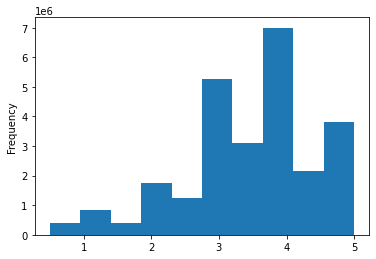

In [77]:
#plot a histogram
pd.options.display.float_format = '{:20,.2f}'.format
ratings_data['rating'].plot(kind='hist')
ratings_data['rating'].describe()

In [81]:
#merge wikipedia data and kaggle data
wiki_movies_df.columns
#movies_df = pd.merge(wiki_movies_df, kaggle_metadata, on='imdb_id', suffixes=['_wiki','_kaggle'])

Index(['url', 'year', 'imdb_link', 'title', 'Based on', 'Starring',
       'Cinematography', 'Release date', 'Country', 'Language', 'Director',
       'Distributor', 'Editor(s)', 'Composer(s)', 'Producer(s)',
       'Production company(s)', 'Writer(s)', 'imdb_id', 'box_office', 'budget',
       'release_date', 'running_time'],
      dtype='object')

In [82]:
kaggle_metadata.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [83]:
movies_df = pd.merge(wiki_movies_df, kaggle_metadata, on='imdb_id', suffixes=['_wiki','_kaggle'])

In [84]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle           Drop wikipedia
# running_time             runtime
# budget_wiki              budget_kaggle
# box_office               revenue
# release_date_wiki        release_date_kaggle
# Language                 original_language
# Production company(s)    production_companies

In [85]:
#Look the rows where titles dont match in both the tables
movies_df[movies_df['title_wiki'] != movies_df['title_kaggle']][['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
27,China Cry,China Cry: A True Story
36,Daddy's Dyin' ...Who's Got the Will?,Daddy's Dyin'... Who's Got the Will?
38,The Dark Side of the Moon,The Dark Side of The Moon
42,Delta Force 2,Delta Force 2: The Colombian Connection
48,DuckTales the Movie:Treasure of the Lost Lamp,DuckTales: The Movie - Treasure of the Lost Lamp
...,...,...
5956,Chips,CHiPS
5971,Spark,Spark: A Space Tail
5994,Pirates of the Caribbean:Dead Men Tell No Tales,Pirates of the Caribbean: Dead Men Tell No Tales
6023,Valerian and the Cityof a Thousand Planets,Valerian and the City of a Thousand Planets


In [86]:
# Show any rows where title_kaggle is empty
movies_df[(movies_df['title_kaggle'] == '') | (movies_df['title_kaggle'].isnull())]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


In [ ]:
#no null results found so drop the Wikipedia titles column